# Random Forest and Gradient Boosting

## Random Forest Classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

df = pd.read_csv("datasets/Social_Network_Ads.csv")
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [2]:
X = df.iloc[:,[2,3]].values.astype("float32")
y = df.iloc[:,4].values
X.shape, y.shape

((400, 2), (400,))

In [3]:
X_train, X_test, y_train,  y_test = train_test_split(X, y , test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape , y_train.shape, y_test.shape

((320, 2), (80, 2), (320,), (80,))

In [4]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [66]:
#RandomForestClassifier?
# n_estimators --> 나무를 몇 개를 만들것이냐
# citerion --> 무슨 트리 알고리즘을 쓸 것이냐, 

In [6]:
rf = RandomForestClassifier(n_estimators = 10, random_state = 0) #랜덤 포레스트는 랜덤이니깐 random_state을 맞춰준다. 
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [7]:
y_pred = rf.predict(X_test)

accuracy_score(y_test, y_pred)

0.925

## Gradient Boosting Classifier

- min_samples_split : node 분리에 필요한 최소 sample 수 => overfitting 방지  
- max_depth : tree 깊이 조절 => overfitting 방지
- learning_rate : 각 tree 의 기여도 조정, n_estimators 와 trade-off 
- n_estimators : number of sequential trees

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
# Gradient Boosting은 학습률을 정해준다고 했음. 
# 랜덤 포레스트는 나무를 10개 만들어서 평균을 내는 배깅 트리였음, 보팅하는 알고리즘이었고
# 그래디언트 부스팅은 잔차를 계속 이어서 앞에 트리가 만든 오류를 뒤에 트리가 예측하는 오차를 예측하는 방식이기 때문에
# 그래디언트 부스트이라고 하는 것은 깊지 않은 나무, 
#그냥 부정확한 나무들이 계속 이어서 아주 단순한 나무들이 계속 이어져서 앞에 나무가 만든 잔차를 예측하는 그런 모델이기 때문에
#depth를 작게 해줌.
# 나무를 많이 만들어야함 --> 500개 정도 만들자. 
gb = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 500, max_depth = 5)
gb.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=500)

In [9]:
y_pred = gb.predict(X_test)

accuracy_score(y_test, y_pred)

0.925

## Visualization of the Training result

In [47]:
from matplotlib.colors import ListedColormap
# 진한 빨강색, 진한 초록색
cmap_bold = ListedColormap(['#FF0000','#00FF00']) # '#'이라는 건 16진수를 의미. FF00-->그러면 레드가 멕시멈이고 
# RGB 그린,블루는 0 이런걸 하나 놓고, 두 번째로는 그린을 최대로 놓고, 빨강,파란을 00으로 설정
# 연한 빨강색, 연한 초록색
cmap_light = ListedColormap(['#FFAAAA','#AAFFAA']) # 빨강을 제외하고 AA를 해주면 연한 붉은색이 나옴.


 데이터를 X,Y,의 범위를 나타내줘야 하는데 이것들은 이 가상의 데이터를 가지고 이 부분들을 색깔을 칠해 주려고 한다.
 가상의 데이터로 우리 모델이 예측하는 그 예측값을 갖고 색깔을 칠하면 이 부분에 가상의 어떤 데이터가 왔을 때
 무슨 색으로 칠해지느냐 그걸 보고 이 가상의 데이터가 이런 지점에 왔을 때 어떤 클래스로 분류를 하겠다는 것을 
 시각화해서 우리가 예측을 할 수 있

In [62]:
# 어떤 식으로 가상의 데이터가 만들어지는지 meshgrid 예
np.meshgrid([1,2,3,4],[5,6,7,8]) # 아래 min,max이랑 대응해서 보면 쉬움
# --> 이런식으로 데이터를 촘촘하게 만들기 위해서 이 개수만큼 복제를 한다
# 5,6,7,8도 1,2,3,4개수만큼 복제를 해서 짝을 맞춰 줄 수 있도록 한다.
# 넘파이 중에서 좀 이해하기 힘든 부분임. 

[array([[1, 2, 3, 4],
        [1, 2, 3, 4],
        [1, 2, 3, 4],
        [1, 2, 3, 4]]),
 array([[5, 5, 5, 5],
        [6, 6, 6, 6],
        [7, 7, 7, 7],
        [8, 8, 8, 8]])]

In [48]:
# X의 전체 레코드 중에서 첫 번쩨, age
x1_min, x1_max = X_test[:,0].min()-1, X_test[:,0].max() + 1  # X축의 최소값, 최댓값 설정하기, 적당한 간격을 벌려주기 위해 +1,-1
x2_min, x2_max = X_test[:,1].min()-1, X_test[:,1].max() + 1 #X2의 최솟값, 최댓값 (Y축)
# X1,X2 ,여기서 가상의 데이터를 하나 만들어주는 것은 이 교차되는 점 X1과 X2가 서로 만나는 그 점마다 데이터를 하나씩 만들어줌
# --> 이걸 해주는 게 meshgrid라고 하는 함수, 이렇게 구물코처럼 서로 엇갈려 주는게 ??
X1,X2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                    np.arange(x2_min, x2_max, 0.1)) # x1_min~max 사이에 데이터를 만드는데 0.1 간격으로

In [49]:
X1.shape # 이 데이터를 이제 column 스택으로 펼쳐줌, label을 1차원으로 펼쳐준다. 
X1.ravel()

array([-2.96547973, -2.86547973, -2.76547973, ...,  2.83452027,
        2.93452027,  3.03452027])

In [50]:
X2.shape # (60,61)
X2.ravel()

array([-2.59138155, -2.59138155, -2.59138155, ...,  3.30861845,
        3.30861845,  3.30861845])

In [51]:
XX = np.column_stack([X1.ravel(), X2.ravel()])
XX.shape # 원래 우리의 데이터는 (400,2)였는데 지금 이제 3660개 우리가 가상의 데이터를 만들고 
# 이렇게 XX 라는게 가상의 데이터가 생긴거임. --> 이 가상의 데이터로 우리가 색깔을 칠할거임

(3660, 2)

In [52]:
Y_rf = np.array(rf.predict(XX))
Y_rf

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [53]:
Y_gb = np.array(gb.predict(XX))

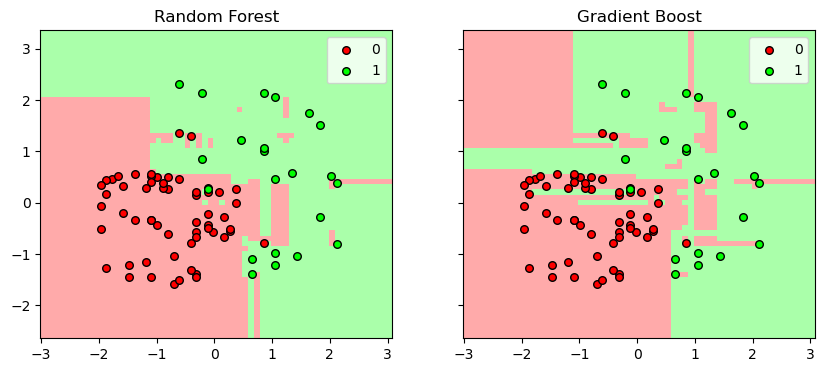

In [61]:
# 하나의 행에 두 개의 열,양옆에 두 개를 그리니깐 OP 형식으로 시각화하기
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# Random Forest
# x축, y축, 색깔까지 총 3차원으로 줄거임!
ax1.pcolormesh(X1, X2, Y_rf.reshape(X1.shape), cmap=cmap_light, shading='auto') 
# 실제 우리 데이터가 여기 어디에 속하는지 그려보자. 
for i in range(2):
    ax1.scatter(X_test[y_test == i, 0], X_test[y_test == i,1], color=cmap_bold(i), label=i, s = 30, edgecolor='k')
ax1.set_title("Random Forest")
ax1.legend()
# 생성된 결정경계를 보고 이제 수정을 할 수 있음 --> 나무를 좀 고쳐서 데이터가 잘 분류될 수 있도록

# Gradient Boost
ax2.pcolormesh(X1, X2, Y_gb.reshape(X1.shape), cmap=cmap_light, shading='auto')
for i in range(2):
    ax2.scatter(X_test[y_test == i, 0], X_test[y_test == i,1], color=cmap_bold(i), label=i, s = 30, edgecolor='k')
ax2.set_title("Gradient Boost") # 이거 두개로 예측한걸 시각화해서 비교해보기 
ax2.legend()

In [63]:
gb.feature_importances_ # 둘 다 중요도가 크다.

array([0.49364806, 0.50635194])

In [64]:
feature_imp = pd.Series(gb.feature_importances_, ['Age','Estimated Salary']) # 두번째 매개변수는 인덱스를 준다.
feature_imp

Age                 0.493648
Estimated Salary    0.506352
dtype: float64

<Axes: title={'center': 'Feature importance'}>

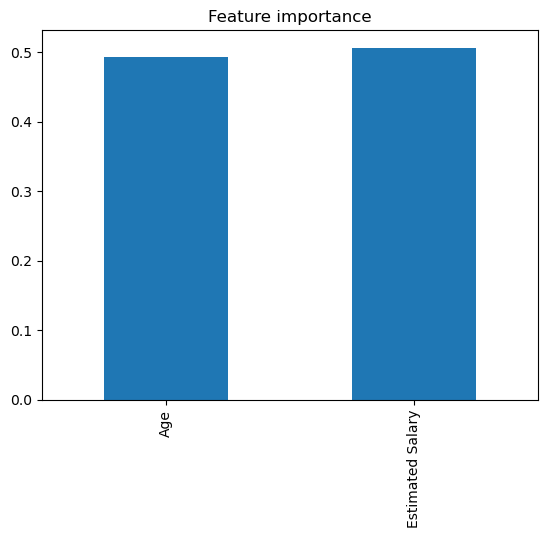

In [65]:
feature_imp.plot(kind='bar',title='Feature importance')